<a href="https://colab.research.google.com/github/AtharvaPhansalkar/sparksfoundation/blob/master/T2_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn  
%matplotlib inline

In [38]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.info(7)

print("CONFIRMS WE HAVE NO NON NULL VALUE")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
CONFIRMS WE HAVE NO NON NULL VALUE


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

**From the graph below, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

[1.1        1.18181818 1.26363636 1.34545455 1.42727273 1.50909091
 1.59090909 1.67272727 1.75454545 1.83636364 1.91818182 2.
 2.08181818 2.16363636 2.24545455 2.32727273 2.40909091 2.49090909
 2.57272727 2.65454545 2.73636364 2.81818182 2.9        2.98181818
 3.06363636 3.14545455 3.22727273 3.30909091 3.39090909 3.47272727
 3.55454545 3.63636364 3.71818182 3.8        3.88181818 3.96363636
 4.04545455 4.12727273 4.20909091 4.29090909 4.37272727 4.45454545
 4.53636364 4.61818182 4.7        4.78181818 4.86363636 4.94545455
 5.02727273 5.10909091 5.19090909 5.27272727 5.35454545 5.43636364
 5.51818182 5.6        5.68181818 5.76363636 5.84545455 5.92727273
 6.00909091 6.09090909 6.17272727 6.25454545 6.33636364 6.41818182
 6.5        6.58181818 6.66363636 6.74545455 6.82727273 6.90909091
 6.99090909 7.07272727 7.15454545 7.23636364 7.31818182 7.4
 7.48181818 7.56363636 7.64545455 7.72727273 7.80909091 7.89090909
 7.97272727 8.05454545 8.13636364 8.21818182 8.3        8.38181818
 8.4636363

array([13.23705714, 14.03689559, 14.83673405, 15.63657251, 16.43641097,
       17.23624943, 18.03608789, 18.83592635, 19.63576481, 20.43560327,
       21.23544173, 22.03528019, 22.83511865, 23.63495711, 24.43479556,
       25.23463402, 26.03447248, 26.83431094, 27.6341494 , 28.43398786,
       29.23382632, 30.03366478, 30.83350324, 31.6333417 , 32.43318016,
       33.23301862, 34.03285708, 34.83269553, 35.63253399, 36.43237245,
       37.23221091, 38.03204937, 38.83188783, 39.63172629, 40.43156475,
       41.23140321, 42.03124167, 42.83108013, 43.63091859, 44.43075705,
       45.23059551, 46.03043396, 46.83027242, 47.63011088, 48.42994934,
       49.2297878 , 50.02962626, 50.82946472, 51.62930318, 52.42914164,
       53.2289801 , 54.02881856, 54.82865702, 55.62849548, 56.42833393,
       57.22817239, 58.02801085, 58.82784931, 59.62768777, 60.42752623,
       61.22736469, 62.02720315, 62.82704161, 63.62688007, 64.42671853,
       65.22655699, 66.02639545, 66.8262339 , 67.62607236, 68.42

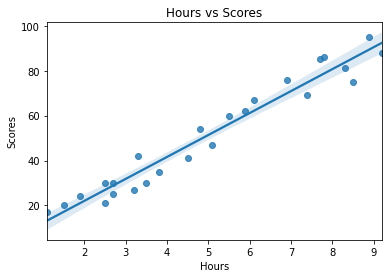

In [30]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
p = seaborn.regplot( 'Hours', y = 'Scores', data = data,ax=ax)
plt.title('Hours vs Scores')
print(p.get_lines()[0].get_xdata())
p.get_lines()[0].get_ydata()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [42]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1) 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [47]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")
print('Intercept =', regressor.intercept_)
print('Coef =',regressor.coef_)

Training complete.
Intercept = [2.01816004]
Coef = [[9.91065648]]


In [49]:
line = regressor.coef_*X+regressor.intercept_

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [50]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [53]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [70]:
# You can also test with your own data
hours = 9.25
hour=[[hours]]
own_pred = regressor.predict(hour)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
